In [2]:
import pandas as pd
import numpy as np

# Đọc dữ liệu
fake_df = pd.read_csv('/Users/nobitad/Documents/GitHub/ML-Fake-News-Detection/Datasets/Fake.csv')
true_df = pd.read_csv('/Users/nobitad/Documents/GitHub/ML-Fake-News-Detection/Datasets/True.csv')

# Thêm nhãn phân loại
fake_df['label'] = 0
true_df['label'] = 1

# Hợp nhất dữ liệu
data = pd.concat([fake_df, true_df], axis=0).reset_index(drop=True)

# Hiển thị thông tin cơ bản về dữ liệu
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Chọn cột văn bản và nhãn
X = data['text']
y = data['label']

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Khởi tạo các mô hình
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Khởi tạo các mô hình
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Huấn luyện và đánh giá các mô hình
for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    print(f"{model_name} Model")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")

Decision Tree Model
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4733
           1       0.99      1.00      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Accuracy: 0.994097995545657

Random Forest Model
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Accuracy: 0.9900890868596882

Logistic Regression Model
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4733
           1       0.98      0.98      0.98      4247

    accuracy                           0.98      8980
   

In [8]:
from sklearn.model_selection import GridSearchCV

# Định nghĩa các siêu tham số cho từng mô hình
param_grids = {
    'Decision Tree': {
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 10, 20]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None]
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

# Tối ưu hóa các siêu tham số
for model_name, param_grid in param_grids.items():
    grid_search = GridSearchCV(models[model_name], param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_tfidf, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_tfidf)
    print(f"Best {model_name} Model after Hyperparameter Tuning")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")

Best Decision Tree Model after Hyperparameter Tuning
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4733
           1       0.99      1.00      0.99      4247

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Accuracy: 0.9952115812917595

Best Random Forest Model after Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Accuracy: 0.9909799554565701

Best Logistic Regression Model after Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1

Decision Tree Model
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4733
           1       0.99      1.00      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Accuracy: 0.994097995545657



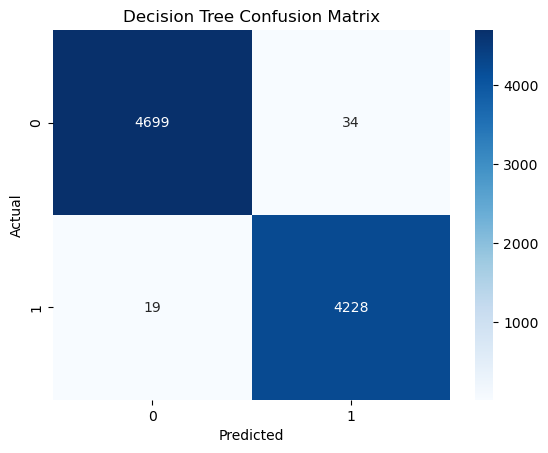

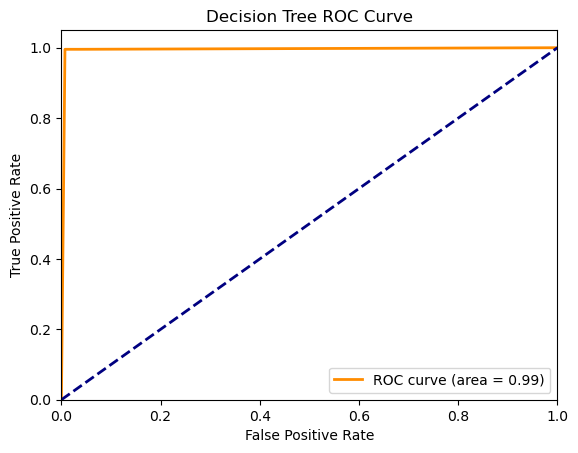

Random Forest Model
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Accuracy: 0.9900890868596882



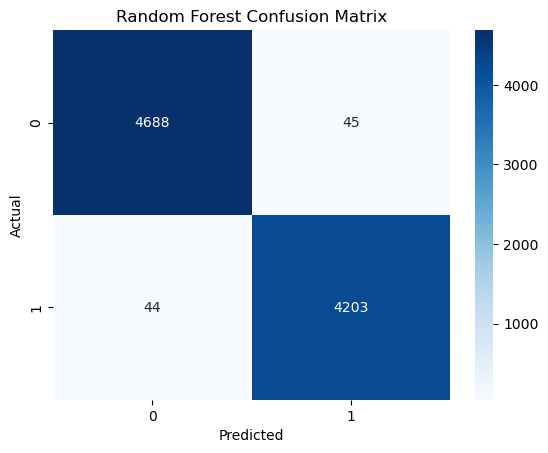

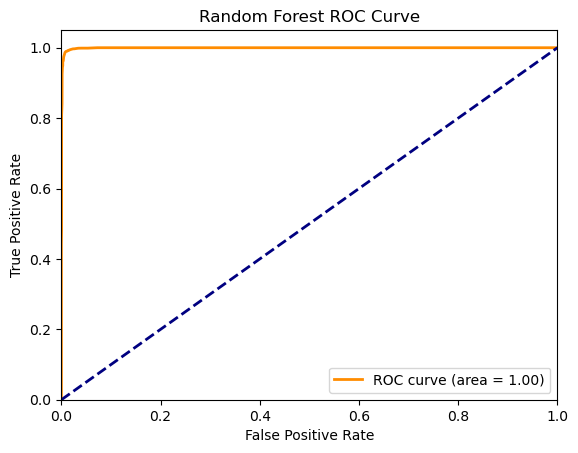

Logistic Regression Model
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4733
           1       0.98      0.98      0.98      4247

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980

Accuracy: 0.9839643652561247



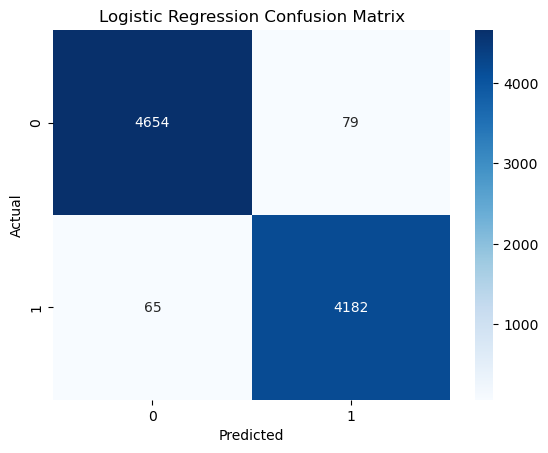

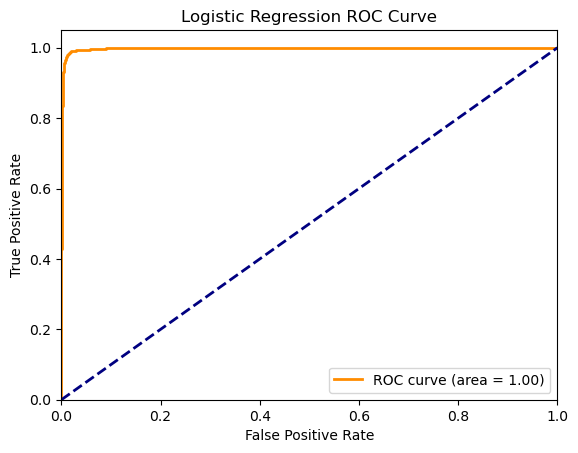

Gradient Boosting Model
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4733
           1       0.99      1.00      0.99      4247

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Accuracy: 0.9952115812917595



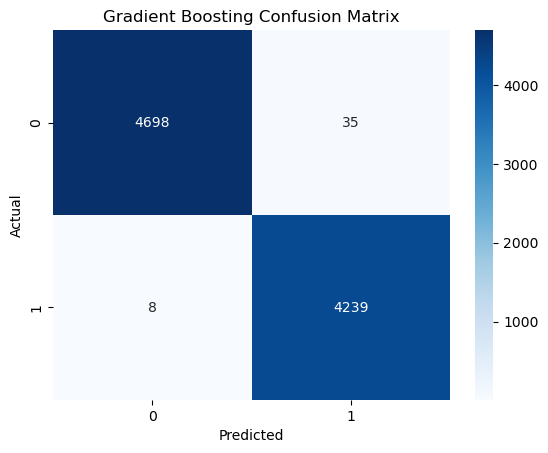

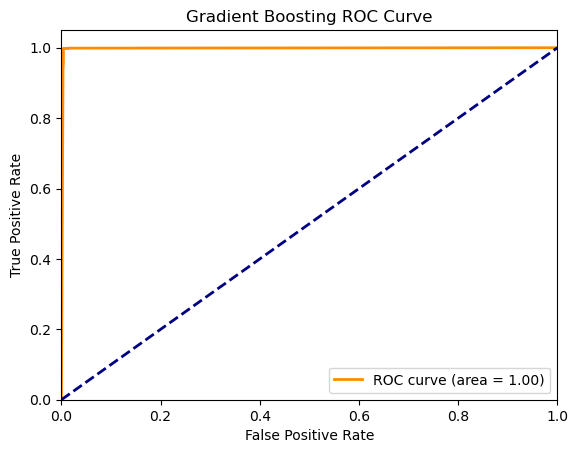

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Ma trận nhầm lẫn
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Biểu đồ ROC
def plot_roc_curve(y_true, y_pred_proba, title='ROC Curve'):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Khởi tạo các mô hình
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Huấn luyện và đánh giá các mô hình
for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    print(f"{model_name} Model")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
    
    y_pred_proba = model.predict_proba(X_test_tfidf)[:, 1]
    plot_confusion_matrix(y_test, y_pred, title=f'{model_name} Confusion Matrix')
    plot_roc_curve(y_test, y_pred_proba, title=f'{model_name} ROC Curve')

Best Decision Tree Model after Hyperparameter Tuning
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4733
           1       0.99      1.00      0.99      4247

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Accuracy: 0.9952115812917595



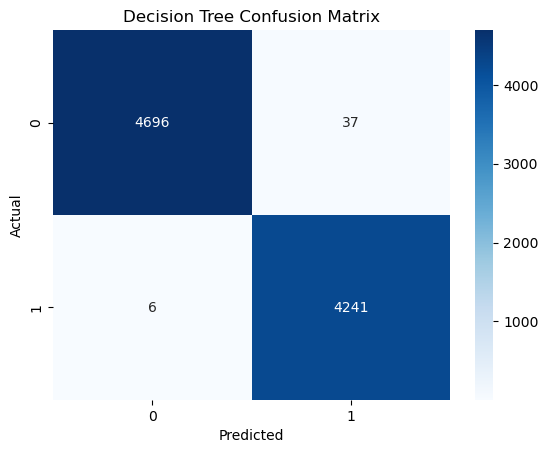

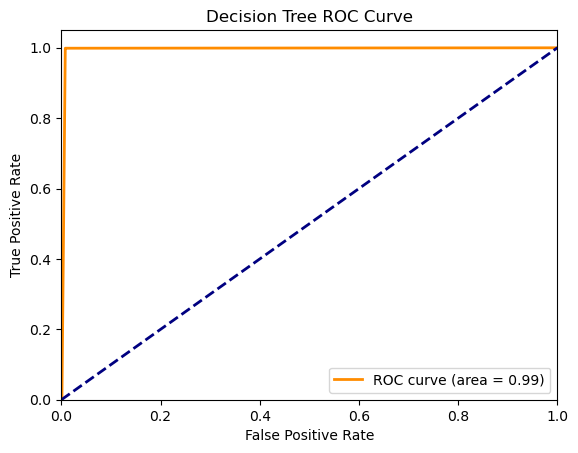

Best Random Forest Model after Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Accuracy: 0.9909799554565701



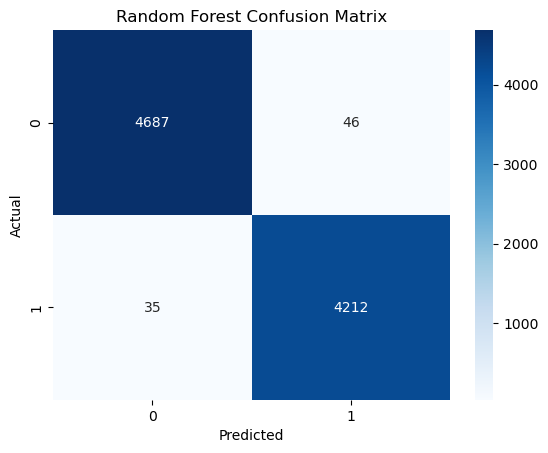

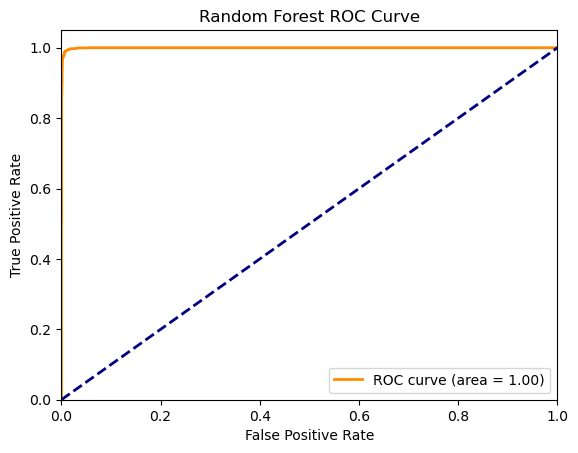

Best Logistic Regression Model after Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Accuracy: 0.9926503340757238



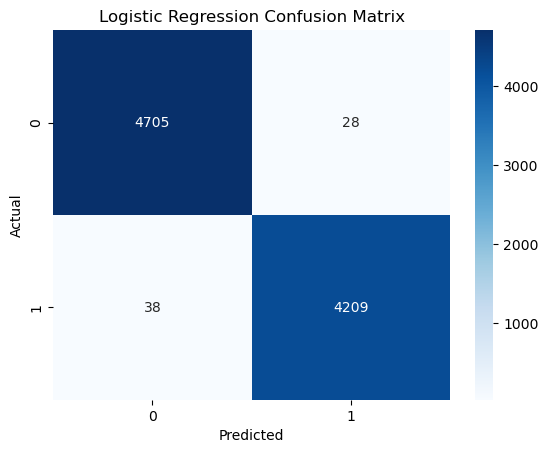

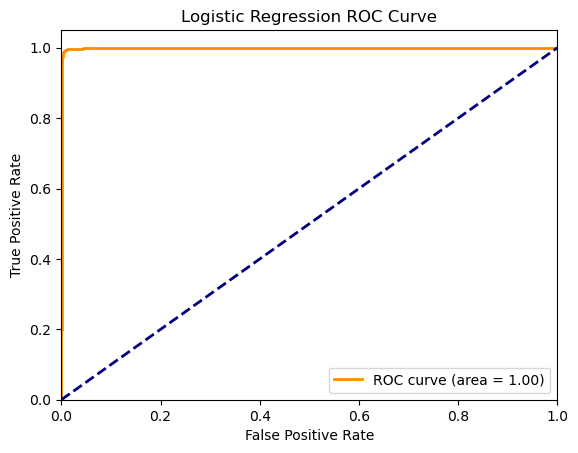

Best Gradient Boosting Model after Hyperparameter Tuning
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4733
           1       1.00      1.00      1.00      4247

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Accuracy: 0.9968819599109131



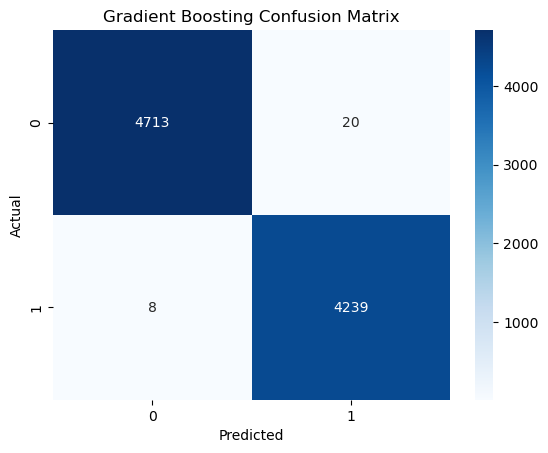

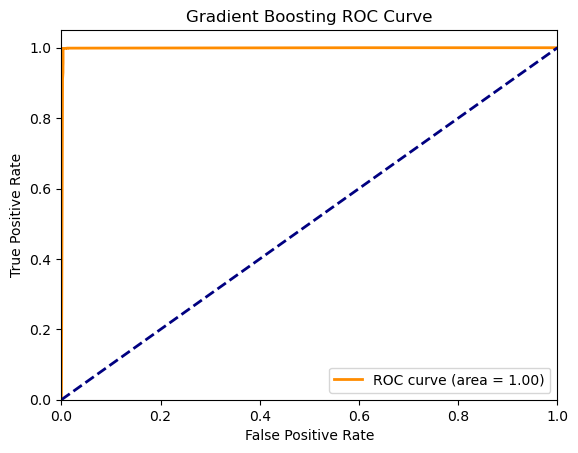

In [17]:
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Ma trận nhầm lẫn
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Biểu đồ ROC
def plot_roc_curve(y_true, y_pred_proba, title='ROC Curve'):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Định nghĩa các siêu tham số cho từng mô hình
param_grids = {
    'Decision Tree': {
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 10, 20]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None]
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

# Tối ưu hóa các siêu tham số
for model_name, param_grid in param_grids.items():
    grid_search = GridSearchCV(models[model_name], param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_tfidf, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_tfidf)
    print(f"Best {model_name} Model after Hyperparameter Tuning")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
    
    y_pred_proba = best_model.predict_proba(X_test_tfidf)[:, 1]
    plot_confusion_matrix(y_test, y_pred, title=f'{model_name} Confusion Matrix')
    plot_roc_curve(y_test, y_pred_proba, title=f'{model_name} ROC Curve')

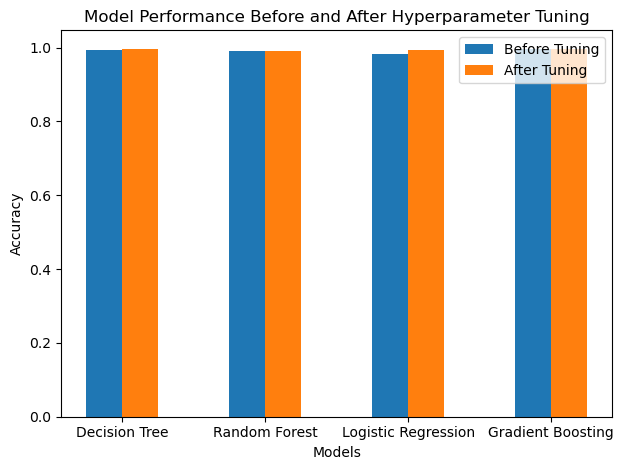

In [15]:
# So sánh hiệu suất các mô hình trước và sau khi tối ưu hóa siêu tham số
model_names = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'Gradient Boosting']
accuracies_before = [0.994097995545657, 0.9900890868596882, 0.9839643652561247, 0.9952115812917595]  
accuracies_after = [0.9952115812917595, 0.9909799554565701, 0.9926503340757238, 0.9968819599109131]   

x = np.arange(len(model_names))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracies_before, width, label='Before Tuning')
rects2 = ax.bar(x + width/2, accuracies_after, width, label='After Tuning')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Model Performance Before and After Hyperparameter Tuning')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

fig.tight_layout()
plt.show()
